# Análisis de Factores que Incrementan el Consumo de Combustible y la Huella de Carbono

In [1]:
# IMPORTAR LIBRERIAS NECESARIAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import IPython.core.display as HTML

# DECLARACIÓN DE VARIABLES 
paises_industrializados = ["Estados Unidos", "Canada", "Japón", "Alemania", "Reino Unido"]
paises_emergentes = ["China", "India", "Brasil", "México", "Corea del Sur"]

## 1 Lectura y limpieza de los datos

### 1.1. Resumen de cambios y variables resultantes

In [2]:
# Proyecto de medio curso para Samsung Innovation Campus: Huella de carbono

# Lectura de datos y limpieza
# Autor: Dwight Sutherland
# Fecha: 3/18/2024


#______________________________________Resumen de los cambios y variables resultantes_______________________________________
'''
Este codigo se encarga de limpiar los datos originales y de crear un nuevo dataframe con los datos de 1990 en adelante.
Ademas, se crea un dataframe con los paises que nos interesan y se separan en dos grupos: paises industrializados 
y paises emergentes.

Para cada uno de los dataframes se crea un archivo csv para su visualizacion rapida y se crea un codebook con las 
definiciones de las categorias restantes.

Los archivos creados por este código son:

    - owid-co2-data-1990.csv: dataframe con los datos de 1990 en adelante
    - owid-co2-data-1990-country.csv: dataframe con los paises que nos interesan
    - industrializados.csv: dataframe con los paises industrializados
    - emergentes.csv: dataframe con los paises emergentes
    - owid-co2-codebook-new.csv: codebook con las categorias restantes
'''



# Las variables resultantes son:
#   data_og: dataframe con los datos originales
#   data: dataframe con los datos de 1990 en adelante
#   data_ind: dataframe con los paises industrializados
#   data_em: dataframe con los paises emergentes
#   codebook_og: codebook original
#   codebook: codebook con las categorias restantes



# Las categorias que se eliminaron porque incluían datos vacios son:
'''
{'cumulative_other_co2', 'share_of_temperature_change_from_ghg', 'temperature_change_from_n2o', 'trade_co2_share', 
'energy_per_gdp', 'consumption_co2_per_capita', 'methane', 'temperature_change_from_ch4', 'consumption_co2', 
'ghg_excluding_lucf_per_capita', 'co2_including_luc_per_gdp', 'co2_per_gdp', 'trade_co2', 'gdp', 'nitrous_oxide', 
'temperature_change_from_ghg', 'temperature_change_from_co2', 'share_global_other_co2', 'consumption_co2_per_gdp', 
'methane_per_capita', 'share_global_cumulative_other_co2', 'total_ghg_excluding_lucf', 'ghg_per_capita', 
'nitrous_oxide_per_capita', 'total_ghg', 'other_industry_co2', 'other_co2_per_capita'}
'''


# Las categorias que permanecen son:
'''
{'co2_including_luc', 'cumulative_coal_co2', 'flaring_co2', 'oil_co2', 'coal_co2', 'coal_co2_per_capita', 
'land_use_change_co2', 'year', 'share_global_cement_co2', 'share_global_cumulative_coal_co2', 'energy_per_capita', 
'share_global_cumulative_cement_co2', 'share_global_gas_co2', 'cumulative_flaring_co2', 'oil_co2_per_capita', 
'co2_per_unit_energy', 'share_global_flaring_co2', 'iso_code', 'co2_including_luc_growth_prct', 'co2', 
'cumulative_cement_co2', 'population', 'share_global_cumulative_co2_including_luc', 'gas_co2_per_capita', 
'share_global_cumulative_co2', 'co2_per_capita', 'share_global_cumulative_flaring_co2', 'share_global_coal_co2', 
'share_global_co2_including_luc', 'cement_co2_per_capita', 'cumulative_co2_including_luc', 'cumulative_gas_co2', 
'co2_including_luc_per_unit_energy', 'share_global_luc_co2', 'share_global_oil_co2', 'share_global_co2', 'gas_co2', 
'primary_energy_consumption', 'cement_co2', 'co2_growth_abs', 'country', 'share_global_cumulative_oil_co2', 
'share_global_cumulative_gas_co2', 'flaring_co2_per_capita', 'co2_including_luc_per_capita', 
'co2_including_luc_growth_abs', 'cumulative_oil_co2', 'land_use_change_co2_per_capita', 
'share_global_cumulative_luc_co2', 'cumulative_luc_co2', 'co2_growth_prct', 'cumulative_co2'}
'''

"\n{'co2_including_luc', 'cumulative_coal_co2', 'flaring_co2', 'oil_co2', 'coal_co2', 'coal_co2_per_capita', \n'land_use_change_co2', 'year', 'share_global_cement_co2', 'share_global_cumulative_coal_co2', 'energy_per_capita', \n'share_global_cumulative_cement_co2', 'share_global_gas_co2', 'cumulative_flaring_co2', 'oil_co2_per_capita', \n'co2_per_unit_energy', 'share_global_flaring_co2', 'iso_code', 'co2_including_luc_growth_prct', 'co2', \n'cumulative_cement_co2', 'population', 'share_global_cumulative_co2_including_luc', 'gas_co2_per_capita', \n'share_global_cumulative_co2', 'co2_per_capita', 'share_global_cumulative_flaring_co2', 'share_global_coal_co2', \n'share_global_co2_including_luc', 'cement_co2_per_capita', 'cumulative_co2_including_luc', 'cumulative_gas_co2', \n'co2_including_luc_per_unit_energy', 'share_global_luc_co2', 'share_global_oil_co2', 'share_global_co2', 'gas_co2', \n'primary_energy_consumption', 'cement_co2', 'co2_growth_abs', 'country', 'share_global_cumulative_o

### 1.2. Lectura de datos

In [3]:
#___________________________________________Lectura de los datos_______________________________________

### Leemos el archivo de datos

ruta_derivada = 'derivados'      # Ruta completa
data_og = 'owid-co2-data.csv'
print(data_og)
data_og = pd.read_csv(data_og)      # Dataframe con los datos originales

owid-co2-data.csv


### 1.3. Dataframe con los datos de 1990 en adelante

In [4]:

#___________________________________________Dataframe con los datos de 1990 en adelante_______________________________________
### Eliminamos las filas correspondientes a 1989 para atrás y guardamos en otro archivo nuevo

# El estudio se realiza de 1990 a 2020

data = data_og[(data_og['year'] >= 1990) & (data_og['year'] <= 2020)]       # Dataframe con los datos de 1990 en adelante
data.to_csv(ruta_derivada + '\data-1990.csv', index=False)


### 1.4. Dataframe con los paises que nos interesan y eliminamos las categorias con valores nulos

In [5]:

#___________________________________________Dataframe con los paises que nos interesan_______________________________________
'''
Creamos un nuevo dataframe con los paises que nos interesan
United States, Canada, Japan, Germany, United Kingdom, China, India, Mexico, South Korea
'''

data = data[(data['country'] == 'United States') | (data['country'] == 'Canada') | (data['country'] == 'Japan')|
            (data['country'] == 'Germany') | (data['country'] == 'United Kingdom') | (data['country'] == 'China')|
            (data['country'] == 'India') | (data['country'] == 'Mexico') | (data['country'] == 'South Korea')| (data['country'] == 'Brazil')]


### Eliminamos las categorias con valores nulos
# Las categorias co2, methane, methane_per_capita, nitrous_oxide, nitrous_oxide_per_capita deben mantenerse
# aunque tengan valores vacios

data_columns = data.columns
data = data.dropna(how='any', axis=1)       # Eliminamos las categorias con valores nulos
data_columns_new = data.columns
data.to_csv(ruta_derivada + '\data-1990-country_of_interest.csv', index=False)


### 1.5. Dataframe con los paises industrializados y emergentes

In [6]:

# ___________________________________________Dataframe con los paises industrializados y emergentes_______________________________________

'''
Separo los datos en dos grupos:
    - Paises industrializados: United States, Canada, Japan, Germany, United Kingdom
    - Paises emergentes: China, India, Mexico, South Korea, Brazil
'''

### Dataframe con los paises industrializados
data_ind = data[(data['country'] == 'United States') | (data['country'] == 'Canada') | (data['country'] == 'Japan')
                | (data['country'] == 'Germany') | (data['country'] == 'United Kingdom')]

### Dataframe con los paises emergentes
data_em = data[(data['country'] == 'China') | (data['country'] == 'India') | (data['country'] == 'Mexico')
                | (data['country'] == 'South Korea') | (data['country'] == 'Brazil')]

data_ind.to_csv(ruta_derivada + '\industrializados.csv', index=False)
data_em.to_csv(ruta_derivada + '\emergentes.csv', index=False)


### 1.6. Codebook con las categorias restantes del dataframe

In [7]:

#___________________________________________Codebook con las categorias restantes_______________________________________

### Modificacion del codebook para que permanezcan solo las categorias restantes
codebook_og = pd.read_csv('owid-co2-codebook.csv')     
codebook = codebook_og[codebook_og['column'].isin(data_columns_new)]      
codebook.to_csv(ruta_derivada + '\codebook-new.csv', index=False)

# print(f'El nuevo codebook tiene {len(codebook)} categorias\nEL codebook original tiene {len(data_columns)} categorias\n')

## **2. Análisis de los Datos**

### **2.1. Calculo de la Huella de carbono de los top 5 países emergente y top 5 países industrializados (desde el 1990 - 2020)**

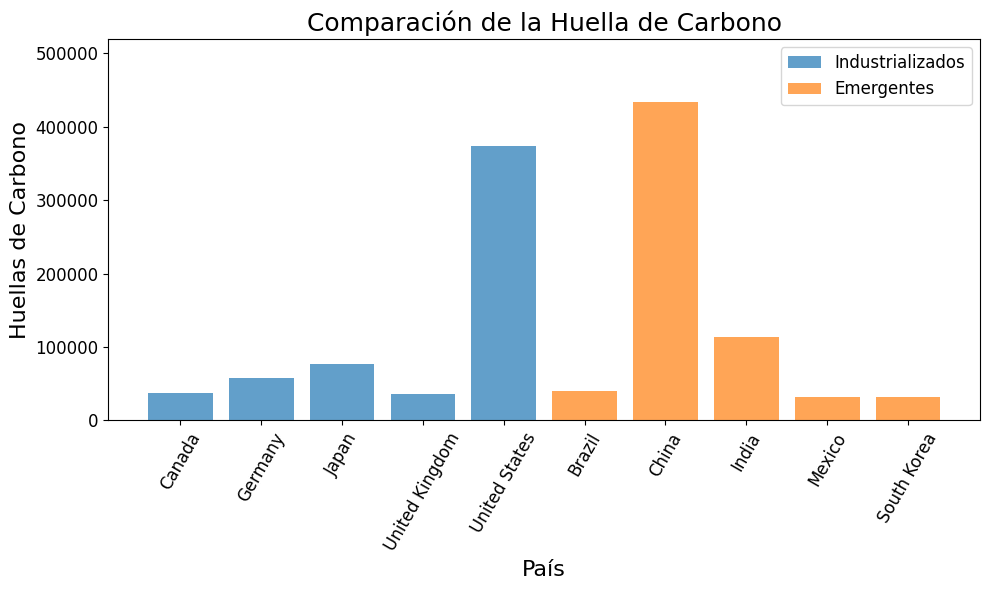

In [8]:
# Calcular huella de carbono de los paises industrializados 
ind_emisiones_columns  = data_ind.groupby('country')[['cement_co2','co2','coal_co2','flaring_co2','gas_co2','methane','nitrous_oxide','oil_co2']].sum()
ind_carbon_footprint  = ind_emisiones_columns.sum(axis=1)

# Calcular huella de carbono de los paises emergentes 
em_emisiones_columns  = data_em.groupby('country')[['cement_co2','co2','coal_co2','flaring_co2','gas_co2','methane','nitrous_oxide','oil_co2']].sum()
em_carbon_footprint  = em_emisiones_columns.sum(axis=1)

# Graficar datos calculados 
fig, ax = plt.subplots(figsize= (10, 6))
ax.bar(ind_carbon_footprint.index, ind_carbon_footprint, label='Industrializados', alpha=0.7)
ax.bar(em_carbon_footprint.index, em_carbon_footprint, label='Emergentes', alpha=0.7)

# Títulos y Etiquetas 
ax.set_title('Comparación de la Huella de Carbono',fontsize=18)
ax.set_xlabel('País',fontsize=16)
ax.set_ylabel('Huellas de Carbono',fontsize=16)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylim(0, max(em_carbon_footprint) * 1.2)

# Leyenda 
ax.legend(fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

### **2.2. Calculo total de la Huella de carbono de los top 5 países emergente y top 5 países industrializados (desde el 1990 - 2020)**

Total de huella de carbono de los Top 5 paises industrializados y emergentes: 
 	1230963.975


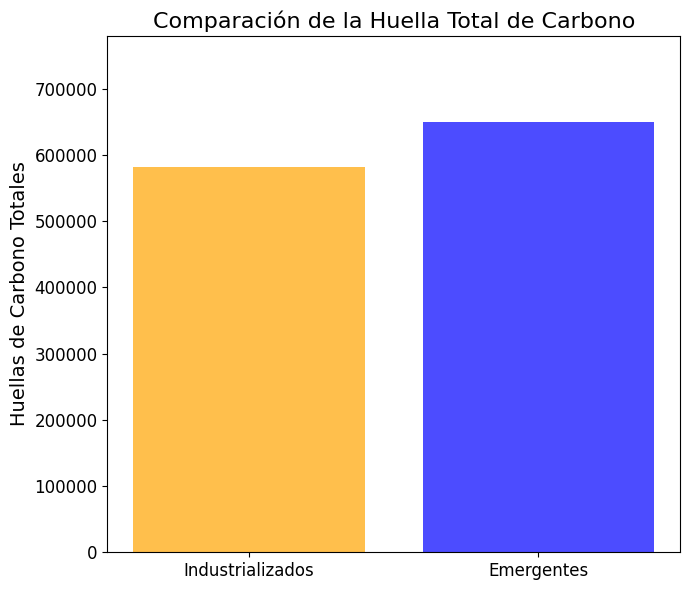

In [9]:
# Total de huella de carbono de los top 5 países industrializados 
total_ind_carbon_footprint = ind_carbon_footprint.sum()

# Total de huella de carbono de los top 5 países emergentes 
total_em_carbon_footprint = em_carbon_footprint.sum()

# Total de la huella de carbono de los top 5 países industrializados y emergentes 
total_carbon_footprint = total_ind_carbon_footprint + total_em_carbon_footprint
print(f'Total de huella de carbono de los Top 5 paises industrializados y emergentes: \n \t{total_carbon_footprint}')

# Graficar datos calculados 
labels = ['Industrializados', 'Emergentes']
carbon_footprints = [total_ind_carbon_footprint, total_em_carbon_footprint]
fig, ax = plt.subplots(figsize= (7, 6))  
ax.bar(labels, carbon_footprints, color=['orange', 'blue'], alpha=0.7)  

# Títulos y Etiquetas 
ax.set_title('Comparación de la Huella Total de Carbono',fontsize=16)
ax.set_ylabel('Huellas de Carbono Totales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylim(0, max(carbon_footprints) * 1.2)  

# Mostrar gráfico
plt.tight_layout()
plt.show()

### **2.3. Top 5 países emergentes e industrializados y su producción de CO2 Per Capita (desde el 1990 - 2020)**

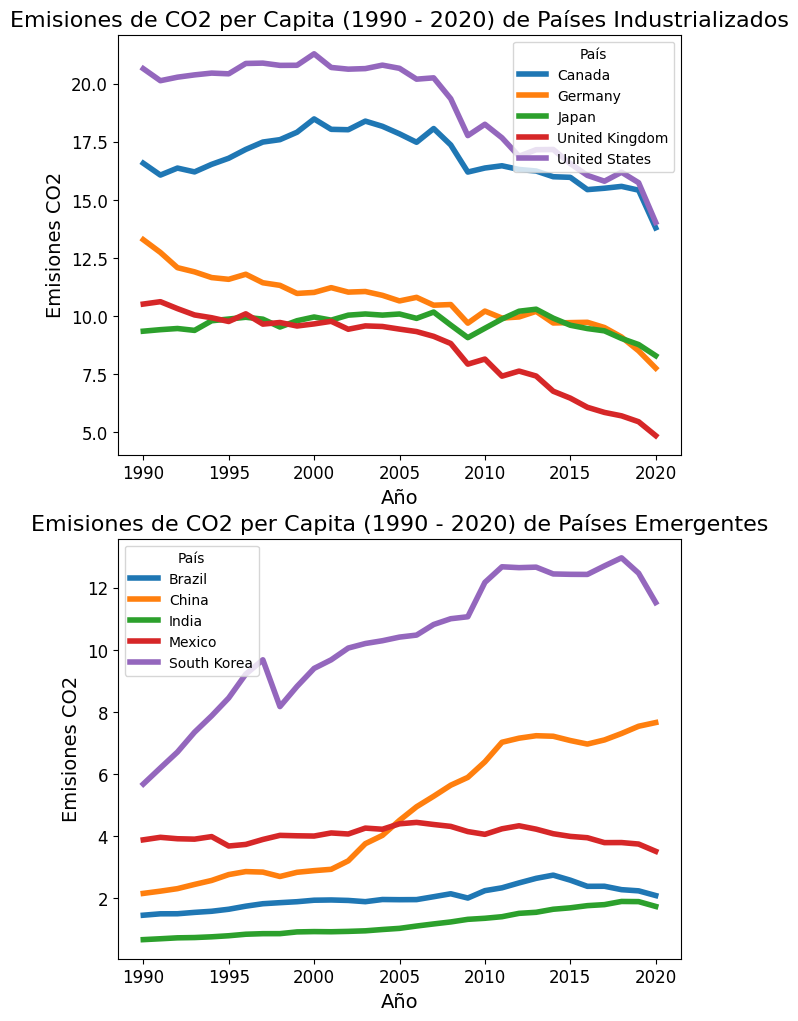

In [42]:
# Crear Gráfico 
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))

# Agrupar los países industrializados 
for country, group in data_ind.groupby('country'):
    group.plot(x='year', ax=ax1, y='co2_per_capita',  label=country, linewidth=4 )
 
# Títulos y Etiquetas 
ax1.set_title('Emisiones de CO2 per Capita (1990 - 2020) de Países Industrializados', fontsize=16)
ax1.set_xlabel('Año', fontsize=14)
ax1.set_ylabel('Emisiones CO2', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(title='País')

# Agrupar los países industrializados 
for country, group in data_em.groupby('country'):
    group.plot(x='year', ax=ax2, y='co2_per_capita',  label=country, linewidth=4 )

# Títulos y Etiquetas 
ax2.set_title('Emisiones de CO2 per Capita (1990 - 2020) de Países Emergentes', fontsize=16)
ax2.set_xlabel('Año', fontsize=14)
ax2.set_ylabel('Emisiones CO2', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Leyenda 
ax2.legend(title='País')

# Mostrar gráfico
plt.show()